<a href="https://colab.research.google.com/github/Rosangelafl/Eleicoes_Brasil/blob/master/candidatos2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from pathlib import Path
import glob, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
path = r'/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/consulta_cand_2020' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, sep=';', quotechar='"', 
                     usecols=['NM_UE','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO',
                              'TP_AGREMIACAO','SG_PARTIDO','NM_PARTIDO','DS_COMPOSICAO_COLIGACAO','DS_NACIONALIDADE',
                              'SG_UF_NASCIMENTO','DT_NASCIMENTO','NR_IDADE_DATA_POSSE','DS_GENERO',
                              'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA','DS_OCUPACAO',
                              'VR_DESPESA_MAX_CAMPANHA','ST_REELEICAO','ST_DECLARAR_BENS'])
                   
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True, sort=False)


In [ ]:
df.index

RangeIndex(start=0, stop=1096678, step=1)

In [ ]:
df.isnull().sum()

NM_UE                      0
DS_CARGO                   0
SQ_CANDIDATO               0
NM_CANDIDATO               0
NM_URNA_CANDIDATO          6
NM_SOCIAL_CANDIDATO        0
TP_AGREMIACAO              0
SG_PARTIDO                 0
NM_PARTIDO                 0
DS_COMPOSICAO_COLIGACAO    0
DS_NACIONALIDADE           0
SG_UF_NASCIMENTO           0
DT_NASCIMENTO              0
NR_IDADE_DATA_POSSE        0
DS_GENERO                  0
DS_GRAU_INSTRUCAO          0
DS_ESTADO_CIVIL            0
DS_COR_RACA                0
DS_OCUPACAO                0
VR_DESPESA_MAX_CAMPANHA    0
ST_REELEICAO               0
ST_DECLARAR_BENS           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096678 entries, 0 to 1096677
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   NM_UE                    1096678 non-null  object
 1   DS_CARGO                 1096678 non-null  object
 2   SQ_CANDIDATO             1096678 non-null  int64 
 3   NM_CANDIDATO             1096678 non-null  object
 4   NM_URNA_CANDIDATO        1096672 non-null  object
 5   NM_SOCIAL_CANDIDATO      1096678 non-null  object
 6   TP_AGREMIACAO            1096678 non-null  object
 7   SG_PARTIDO               1096678 non-null  object
 8   NM_PARTIDO               1096678 non-null  object
 9   DS_COMPOSICAO_COLIGACAO  1096678 non-null  object
 10  DS_NACIONALIDADE         1096678 non-null  object
 11  SG_UF_NASCIMENTO         1096678 non-null  object
 12  DT_NASCIMENTO            1096678 non-null  object
 13  NR_IDADE_DATA_POSSE      1096678 non-null  int64 
 14  DS

In [ ]:
df.head()

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
0,PORTO GRANDE,VEREADOR,30000964748,MARCIO ALESSANDRO MARQUES DOS SANTOS,MARCIO DO MATAPI,#NULO#,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,PA,08/02/1983,37,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,SERVIDOR PÚBLICO MUNICIPAL,12308,N,S
1,MAZAGÃO,VEREADOR,30001199478,MARIA ALDA MONTEIRO DE OLIVEIRA DA SILVA,MARIA ALDA,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,PA,09/06/1978,42,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,24150,N,S
2,MAZAGÃO,VEREADOR,30001199476,THOMAS CARDOSO VIDEIRA,THOMAS VIDEIRA,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,AP,19/07/1993,27,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),PARDA,"VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIA...",24150,N,S
3,ITAUBAL,VEREADOR,30000750065,GRACILIANA MODESTO DE FREITAS,VEREADORA GRACILIANA,#NULO#,PARTIDO ISOLADO,PC do B,PARTIDO COMUNISTA DO BRASIL,PC do B,BRASILEIRA NATA,AP,16/11/1971,49,FEMININO,SUPERIOR INCOMPLETO,CASADO(A),PARDA,PROFESSOR DE ENSINO MÉDIO,12308,N,S
4,OIAPOQUE,VEREADOR,30000818120,ELIEL MORAES DE ALMEIDA,PASTOR ELIEL,#NULO#,PARTIDO ISOLADO,PSC,PARTIDO SOCIAL CRISTÃO,PSC,BRASILEIRA NATA,AP,13/06/1963,57,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,12308,N,S


In [ ]:
df['SQ_CANDIDATO'].nunique()

548339

In [ ]:
df.drop_duplicates(keep='last', inplace=True)

In [ ]:
df['SQ_CANDIDATO'].count()

548339

In [ ]:
df['NM_UE'].nunique()

5295

In [ ]:
# O Brasil tem 5570 municípios. Em 277 cidades os dados do TSE não estavam preenchidos em 1 de setembro de 2020
5570 - 5295

277

In [ ]:
df.groupby(by='DS_GENERO').size()

DS_GENERO
FEMININO     181848
MASCULINO    366491
dtype: int64

In [ ]:
print('candidatas:', ((181848/548339) *100))
print('candidatos:', ((366491/548339) *100))


candidatas: 33.16342627462209
candidatos: 66.83657372537792


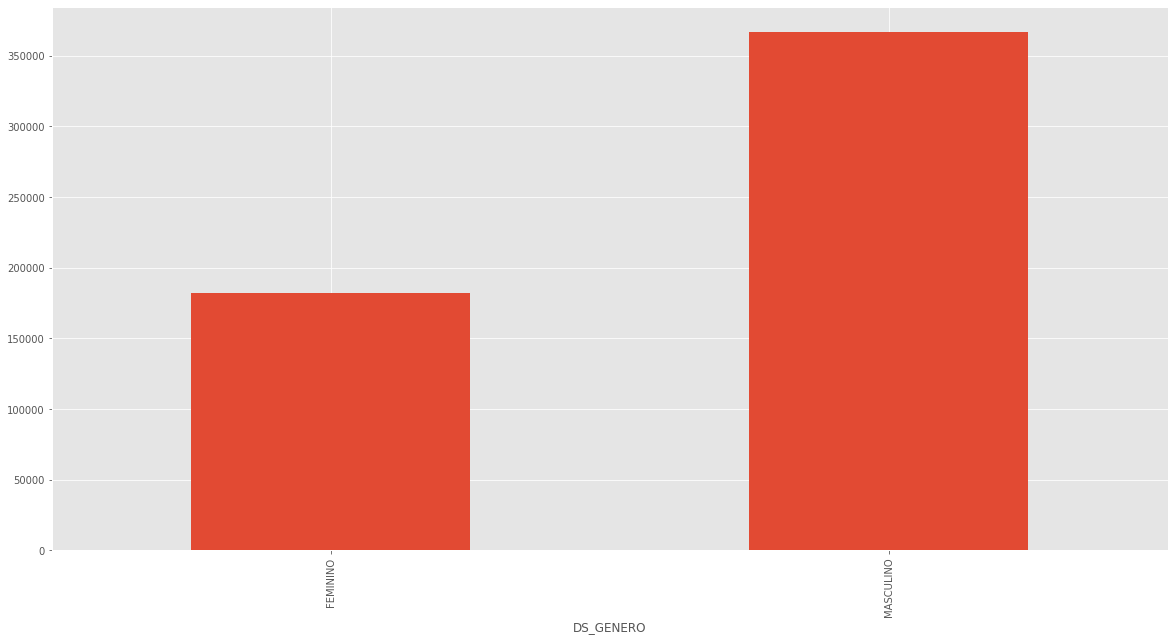

In [ ]:
genero = df.groupby(by='DS_GENERO').size()
genero.plot(kind ='bar')
plt.show()


In [ ]:
df.groupby(by='DS_COR_RACA').size()

DS_COR_RACA
AMARELA             1946
BRANCA            262048
INDÍGENA            2173
PARDA             216341
PRETA              57345
SEM INFORMAÇÃO      8486
dtype: int64

In [ ]:
raca = df.groupby(by='DS_COR_RACA').size()

In [ ]:
print('candidatos autodeclarados de origem asiatica:', ((1946/ 548339) *100))
print('candidatos autodeclarados brancos:', ((262048/ 548339) *100))
print('candidatos autodeclarados indigenas:', ((2173/ 548339) *100))
print('candidatos autodeclarados pardos:', ((216341/ 548339) *100))
print('candidatos autodeclarados pretos:', ((57345/548339) *100))
print('candidatos que não declararam raça/etnia:', ((8486/ 548339) *100))

candidatos autodeclarados de origem asiatica: 0.35488994946556784
candidatos autodeclarados brancos: 47.7894149422164
candidatos autodeclarados indigenas: 0.39628769793868396
candidatos autodeclarados pardos: 39.453877984239675
candidatos autodeclarados pretos: 10.457946635201946
candidatos que não declararam raça/etnia: 1.5475827909377229


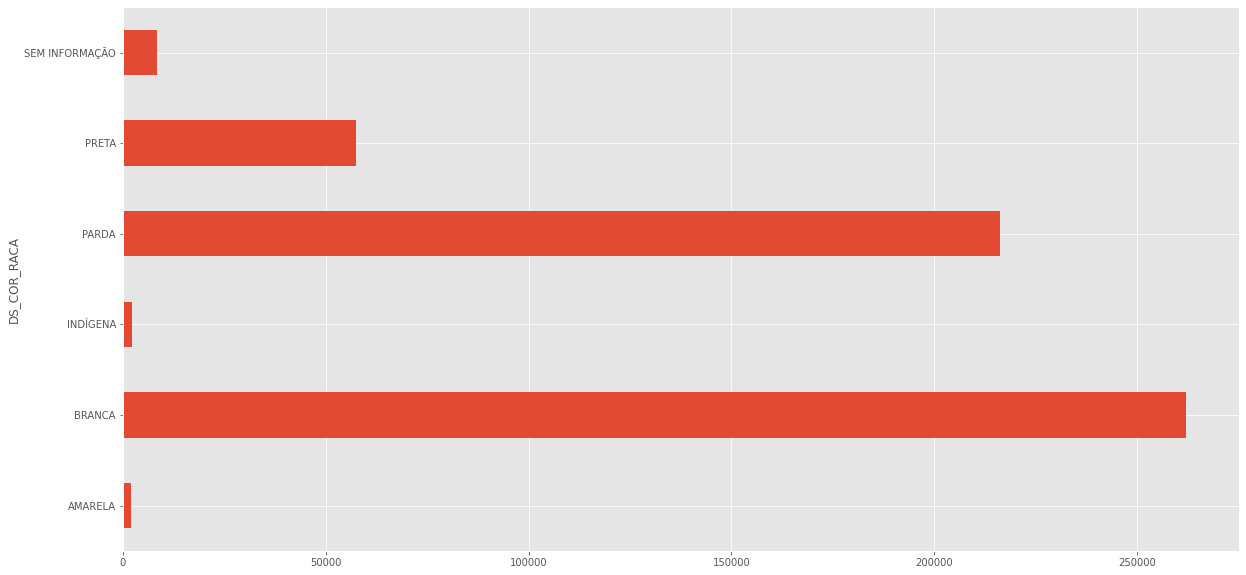

In [ ]:
raca.plot(kind='barh')
plt.show()

In [ ]:
df.query('DS_COR_RACA=="BRANCA" & DS_GENERO=="MASCULINO"').value_counts()

NM_UE            DS_CARGO       SQ_CANDIDATO  NM_CANDIDATO                NM_URNA_CANDIDATO   NM_SOCIAL_CANDIDATO  TP_AGREMIACAO    SG_PARTIDO     NM_PARTIDO                        DS_COMPOSICAO_COLIGACAO  DS_NACIONALIDADE  SG_UF_NASCIMENTO  DT_NASCIMENTO  NR_IDADE_DATA_POSSE  DS_GENERO  DS_GRAU_INSTRUCAO              DS_ESTADO_CIVIL  DS_COR_RACA  DS_OCUPACAO                                     VR_DESPESA_MAX_CAMPANHA  ST_REELEICAO  ST_DECLARAR_BENS
ÓLEO             VICE-PREFEITO  250001089863  LUIZ ROBERTO BEZERRA        NICA DA AMBULÂNCIA  #NULO#               PARTIDO ISOLADO  PSB            PARTIDO SOCIALISTA BRASILEIRO     PSB                      BRASILEIRA NATA   SP                20/09/1961     59                   MASCULINO  ENSINO FUNDAMENTAL INCOMPLETO  CASADO(A)        BRANCA       SERVIDOR PÚBLICO MUNICIPAL                      -1                       S             S                   1
GODOY MOREIRA    VEREADOR       160001188611  CLOVIS FERREIRA DA FONSECA  CLOVINHO     

In [ ]:
df.query('DS_COR_RACA=="PRETA" & DS_GENERO=="FEMININO"').value_counts()

NM_UE            DS_CARGO       SQ_CANDIDATO  NM_CANDIDATO                           NM_URNA_CANDIDATO  NM_SOCIAL_CANDIDATO  TP_AGREMIACAO    SG_PARTIDO    NM_PARTIDO                     DS_COMPOSICAO_COLIGACAO  DS_NACIONALIDADE  SG_UF_NASCIMENTO  DT_NASCIMENTO  NR_IDADE_DATA_POSSE  DS_GENERO  DS_GRAU_INSTRUCAO        DS_ESTADO_CIVIL  DS_COR_RACA  DS_OCUPACAO                                      VR_DESPESA_MAX_CAMPANHA  ST_REELEICAO  ST_DECLARAR_BENS
ÓBIDOS           VICE-PREFEITO  140000892607  MARIA AUTA AMORIM SANTAREM             AUTA SANTAREM      #NULO#               PARTIDO ISOLADO  PT            PARTIDO DOS TRABALHADORES      PT                       BRASILEIRA NATA   PA                14/09/1965     55                   FEMININO   ENSINO MÉDIO COMPLETO    CASADO(A)        PRETA        PROFESSOR DE ENSINO MÉDIO                        -1                       N             S                   1
GARANHUNS        VEREADOR       170000821464  WANDERLÚCIA FAUSTINO MIRANDA           

In [ ]:
df['NR_IDADE_DATA_POSSE'].unique()

array([ 40,  57,  43,  49,  33,  38,  39,  69,  54,  50,  44,  60,  48,
        51,  42,  34,  29,  27,  28,  71,  41,  46,  36,  26,  59,  45,
        31,  47,  65,  32,  23,  58,  56,  68,  25,  66,  35,  37,  16,
        53,  20,  64,  30,  52,  19,  67,  62,  55,  74,  24,  22,  61,
        88,  63,  80,  21,  76,  73,  70,  72,  83,  75,  79,  18,  81,
        77,  78,  82,  84,  86, 103,  89,  90,  85,  95, 100, 101,  87,
        93, 108,  91,  98, 109,  17, 120,  92,  96,  99, 107, 105, 113,
       102, 116])

In [ ]:
df[df['NR_IDADE_DATA_POSSE'] == 120]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
650293,IRAQUARA,VEREADOR,50001213318,ELIZENIA SOUZA OLIVEIRA,RUM,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,BA,11/10/1900,120,FEMININO,LÊ E ESCREVE,SOLTEIRO(A),PARDA,AGRICULTOR,12308,N,S


In [ ]:
df[df['NR_IDADE_DATA_POSSE'] == 17]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
648813,NOVA OLINDA DO NORTE,VEREADOR,40000890686,FRANCINEIA OLIVEIRA DE SOUZA,FRAN SOUZA,#NULO#,PARTIDO ISOLADO,DC,DEMOCRACIA CRISTÃ,DC,BRASILEIRA NATA,AM,24/02/2003,17,FEMININO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",15999,N,S
825797,PEDRO DE TOLEDO,VEREADOR,250000645945,EDVALDO BEZERRA DOS SANTOS,MISTER EDVALDO BEZERRA,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,PE,20/08/2003,17,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,COMERCIANTE,12308,N,S
913372,SALINÓPOLIS,VEREADOR,140001009437,DEYSE ADRIELE DA SILVA SARMANHO,DEYSE SILVA,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,PA,30/06/2003,17,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,34730,N,S


In [ ]:
df.groupby(by='DS_GENERO')['NR_IDADE_DATA_POSSE'].mean()

DS_GENERO
FEMININO     44.346064
MASCULINO    46.192419
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [ ]:
df.groupby(by='DS_GENERO')['NR_IDADE_DATA_POSSE'].max()

DS_GENERO
FEMININO     120
MASCULINO    116
Name: NR_IDADE_DATA_POSSE, dtype: int64

In [ ]:
df['NM_SOCIAL_CANDIDATO'].value_counts()

#NULO#                            548181
ISADORA NEVES GONÇALVES                1
GIGI DE QUEIRÓZ                        1
KAREN DE OLIVEIRA DIOGO                1
NATALIA ALVES MARTINS                  1
                                   ...  
JHÔANNE PEREIRA DE AMORIM              1
LUMA DANDARA ARAUJO                    1
RUBIA EMILIANA VELEDA DA SILVA         1
JHENIFER ALVES FERREIRA                1
ESMERALDA PEREIRA                      1
Name: NM_SOCIAL_CANDIDATO, Length: 159, dtype: int64

In [ ]:
df[df['NM_SOCIAL_CANDIDATO'] != '#NULO#']

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548573,NOVA ALVORADA DO SUL,VEREADOR,120000867308,DAIANE VASCONCELOS,DAIANE VASCONCELOS BITOCA,DAIANE VASCONCELOS,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PT,BRASILEIRA NATA,RO,25/03/1990,30,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,SERVIDOR PÚBLICO MUNICIPAL,23434,N,S
549739,PILÕEZINHOS,VEREADOR,150000969778,JESSICA GAMA RIBEIRO,JESICA GAMA,JÉSSICA GAMA,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,PB,07/09/1976,44,FEMININO,ENSINO MÉDIO INCOMPLETO,SOLTEIRO(A),PARDA,AGRICULTOR,12308,N,S
562336,BARBACENA,VEREADOR,130001170347,LUANA EMERENCIANO,LULU,LUANA EMERENCIANO,PARTIDO ISOLADO,PV,PARTIDO VERDE,PV,BRASILEIRA NATA,MG,05/02/1973,47,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,OUTROS,43201,N,S
563486,SÃO JOSÉ DO GOIABAL,VEREADOR,130000746319,ANDRE SILVA OLIVEIRA,ANDRE GOIABAL,ANDRÉ SILVA OLIVEIRA,PARTIDO ISOLADO,PATRIOTA,PATRIOTA,PATRIOTA,BRASILEIRA NATA,MG,07/07/1979,41,FEMININO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...,12308,N,S
570172,BELO HORIZONTE,VEREADOR,130001018016,ARIELLA SOUZA DUTRA,ARIELLA DUTRA,ARIELLA SOUZA DUTRA,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,MG,17/11/1991,29,FEMININO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,CABELEIREIRO E BARBEIRO,692183,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084589,MOGI MIRIM,VEREADOR,250000798815,ADILSON MARQUES DE OLIVEIRA,ADILSON MARQUES DIL,AMANDA,PARTIDO ISOLADO,PSC,PARTIDO SOCIAL CRISTÃO,PSC,BRASILEIRA NATA,PR,27/02/1969,51,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,CABELEIREIRO E BARBEIRO,30671,N,S
1085322,SÃO JOSÉ DO RIO PARDO,VEREADOR,250001191711,JOYCE DE ARAUJO BARRETO,JOYCE BARRETO,JOYCE DE ARAÚJO BARRETO,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,SP,30/09/1972,48,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,COMERCIANTE,12308,N,S
1086820,PORTO VELHO,VEREADOR,220000839646,RENATA EVANS VALENTE DE QUEIROZ,RENATA EVANS,RENATA EVANS VALENTE QUEIROZ,PARTIDO ISOLADO,CIDADANIA,CIDADANIA,CIDADANIA,BRASILEIRA NATA,PA,10/07/1967,53,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,OUTROS,159288,N,S
1093613,MONTEIRO,VEREADOR,150001007472,CIARA LYS DA SILVA LIMA,CIARA LYS,CIARA LYS DA SILVA LIMA,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PT,BRASILEIRA NATA,PB,07/09/1984,36,FEMININO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,AGRICULTOR,12308,N,S


In [ ]:
df['DS_OCUPACAO'].value_counts()

OUTROS                          116846
AGRICULTOR                       37464
SERVIDOR PÚBLICO MUNICIPAL       35299
EMPRESÁRIO                       32922
COMERCIANTE                      30271
                                 ...  
MINISTRO DO PODER JUDICIÁRIO         1
GEOFÍSICO                            1
DIPLOMATA                            1
METEOROLOGISTA                       1
CONTROLADOR DE TRÁFEGO AÉREO         1
Name: DS_OCUPACAO, Length: 243, dtype: int64

In [ ]:
df.groupby(by='DS_GENERO')['DS_OCUPACAO'].value_counts()

DS_GENERO  DS_OCUPACAO                                                           
FEMININO   OUTROS                                                                    40456
           DONA DE CASA                                                              21267
           SERVIDOR PÚBLICO MUNICIPAL                                                12946
           AGRICULTOR                                                                 9186
           PROFESSOR DE ENSINO FUNDAMENTAL                                            7896
                                                                                     ...  
MASCULINO  TRABALHADOR DE TRATAMENTO DE FUMO E DE FABRICAÇÃO DE CIGARROS/CHARUTOS        3
           SENADOR                                                                       2
           CONTROLADOR DE TRÁFEGO AÉREO                                                  1
           DIPLOMATA                                                                     1
        

In [ ]:
df[df['DS_OCUPACAO'] == 'DIPLOMATA' ]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
969901,RIO DE JANEIRO,VEREADOR,190001233818,CARLOS LEOPOLDO GONCALVES DE OLIVEIRA,CARLOS OLIVEIRA,#NULO#,PARTIDO ISOLADO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,BRASILEIRA NATA,RJ,27/03/1965,55,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA,DIPLOMATA,1594577,N,S


In [ ]:
df[df['DS_OCUPACAO'] == 'SENADOR']

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
636327,GOIÂNIA,PREFEITO,90001220914,VANDERLAN VIEIRA CARDOSO,VANDERLAN CARDOSO,#NULO#,COLIGAÇÃO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSD / PTB / PSC / PP / PMN / AVANTE / DEM,BRASILEIRA NATA,GO,15/11/1962,58,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,SENADOR,6474134,N,S
696842,NATAL,PREFEITO,200001179005,JEAN PAUL TERRA PRATES,SENADOR JEAN,#NULO#,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PT,BRASILEIRA NATA,RJ,19/06/1968,52,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SENADOR,6254509,N,S


In [ ]:
df[df['DS_OCUPACAO'] == 'EMPRESÁRIO']

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548339,MAURILÂNDIA,VEREADOR,90001032264,VALDINEI SILVA VIEIRA,DINEI MOTOS,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,GO,03/10/1980,40,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO,17122,N,S
548347,ANDRADINA,VEREADOR,250000836854,JUCEI SANTANA,SANTANA CONSTRUTOR,#NULO#,PARTIDO ISOLADO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,BRASILEIRA NATA,SP,16/11/1966,54,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,EMPRESÁRIO,31597,N,S
548349,VICENTINA,VEREADOR,120000852607,JOSÉ PEREIRA DE FIGUEIREDO,J PEREIRA,#NULO#,PARTIDO ISOLADO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,BRASILEIRA NATA,MS,27/11/1966,54,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PRETA,EMPRESÁRIO,12308,N,S
548353,VILHENA,VEREADOR,220000849062,LUIZ CARLOS CORREIA DE OLIVEIRA,LUIZ DO MERCADO,#NULO#,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,SP,19/02/1972,48,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO,57344,N,S
548359,CACHOEIRA DOURADA,VEREADOR,90000741782,EDSON FERNANDES LIRA,EDSON LIRA,#NULO#,PARTIDO ISOLADO,PODE,PODEMOS,PODE,BRASILEIRA NATA,GO,01/11/1993,27,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,31798,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096601,LIMEIRA,VEREADOR,250001208483,MONICA FRANZINI KRAUSS,MONICA KRAUSS,#NULO#,PARTIDO ISOLADO,DEM,DEMOCRATAS,DEM,BRASILEIRA NATA,SP,14/07/1968,52,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,125484,N,S
1096628,UBERLÂNDIA,VEREADOR,130001011364,LEANDRO ALVES DA SILVA,LEANDRÃO DO BASQUETE,#NULO#,PARTIDO ISOLADO,PSC,PARTIDO SOCIAL CRISTÃO,PSC,BRASILEIRA NATA,MG,18/10/1983,37,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PRETA,EMPRESÁRIO,549425,N,S
1096635,JARDINÓPOLIS,VEREADOR,250001191822,AGUINALDO JOSE DE SOUZA,AGNALDO GÊMEO,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,SP,26/11/1982,38,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO,21839,N,S
1096646,BURITIZAL,VEREADOR,250001067925,ZAINA APARECIDA PISTORE,ZAINA DA LENICE,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,SP,19/06/1968,52,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,12308,N,S


In [ ]:
df['DS_CARGO'].value_counts(ascending=False)

VEREADOR         509969
VICE-PREFEITO     19206
PREFEITO          19164
Name: DS_CARGO, dtype: int64

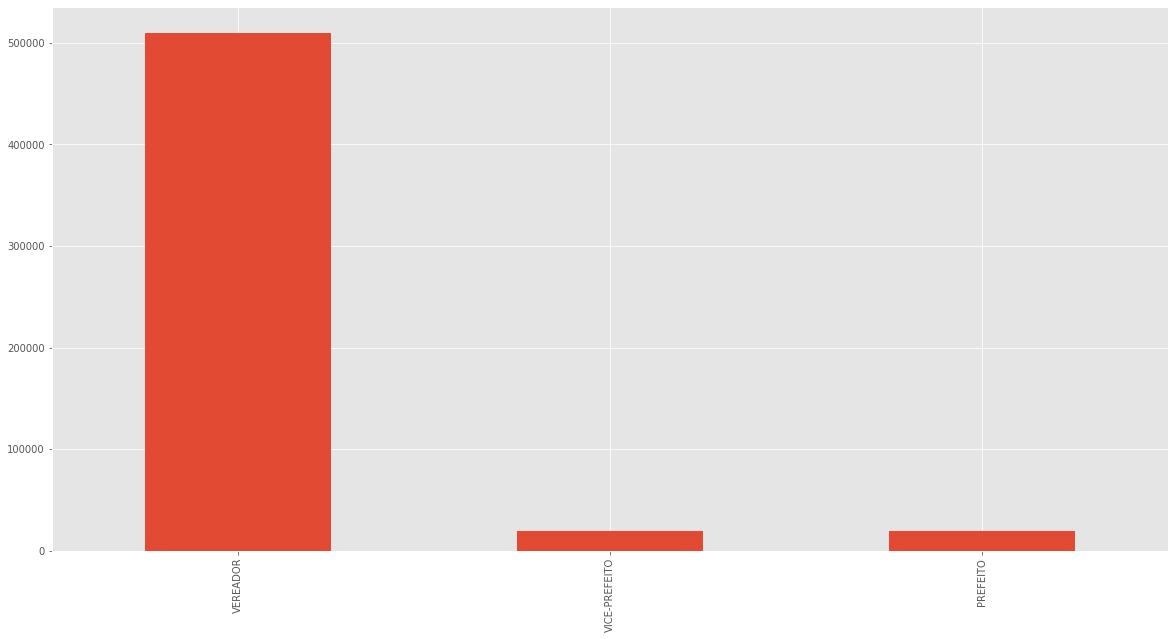

In [ ]:
df['DS_CARGO'].value_counts(ascending=False).plot(kind='bar')

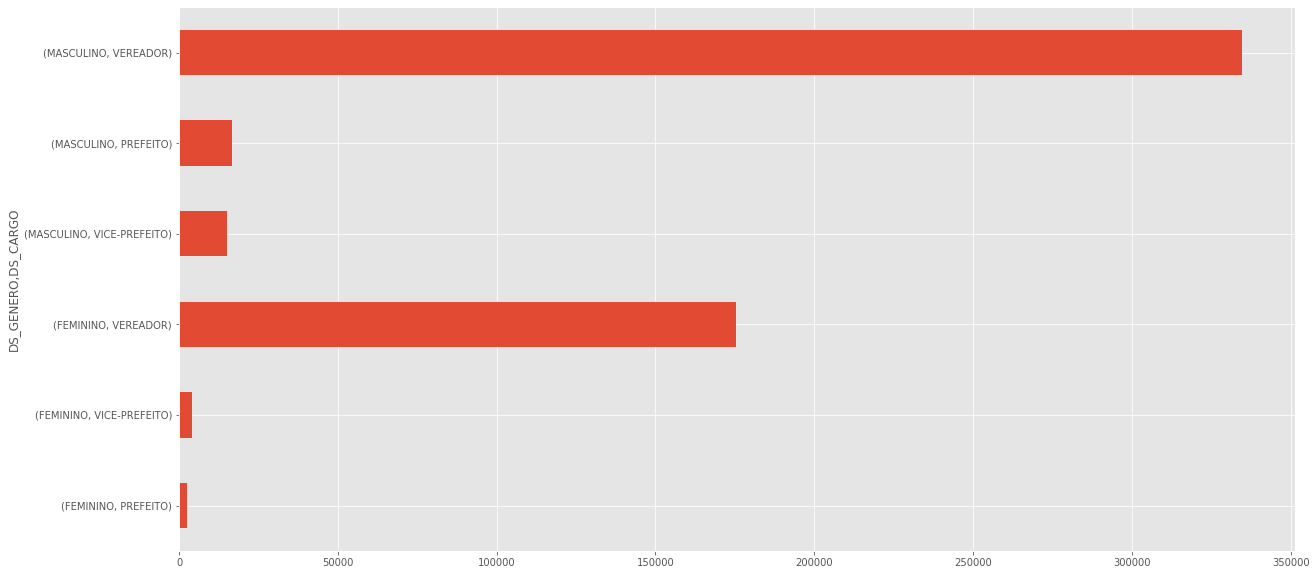

In [ ]:
df.groupby(by='DS_GENERO')['DS_CARGO'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
df.query('DS_CARGO=="PREFEITO" & DS_GENERO=="MASCULINO"').value_counts()

NM_UE            DS_CARGO  SQ_CANDIDATO  NM_CANDIDATO                       NM_URNA_CANDIDATO        NM_SOCIAL_CANDIDATO  TP_AGREMIACAO    SG_PARTIDO    NM_PARTIDO                               DS_COMPOSICAO_COLIGACAO                                                 DS_NACIONALIDADE  SG_UF_NASCIMENTO  DT_NASCIMENTO  NR_IDADE_DATA_POSSE  DS_GENERO  DS_GRAU_INSTRUCAO              DS_ESTADO_CIVIL            DS_COR_RACA  DS_OCUPACAO                           VR_DESPESA_MAX_CAMPANHA  ST_REELEICAO  ST_DECLARAR_BENS
ÓLEO             PREFEITO  250001089862  RUBENS ESTEVES ROQUE               RUBINHO                  #NULO#               PARTIDO ISOLADO  PSB           PARTIDO SOCIALISTA BRASILEIRO            PSB                                                                     BRASILEIRA NATA   SP                10/06/1941     79                   MASCULINO  SUPERIOR INCOMPLETO            CASADO(A)                  BRANCA       APOSENTADO (EXCETO SERVIDOR PÚBLICO)  123077                   S  

In [ ]:
df.query('DS_CARGO=="PREFEITO" & DS_GENERO=="FEMININO"').value_counts()

NM_UE                DS_CARGO  SQ_CANDIDATO  NM_CANDIDATO                                 NM_URNA_CANDIDATO           NM_SOCIAL_CANDIDATO  TP_AGREMIACAO    SG_PARTIDO  NM_PARTIDO                               DS_COMPOSICAO_COLIGACAO  DS_NACIONALIDADE  SG_UF_NASCIMENTO  DT_NASCIMENTO  NR_IDADE_DATA_POSSE  DS_GENERO  DS_GRAU_INSTRUCAO      DS_ESTADO_CIVIL  DS_COR_RACA  DS_OCUPACAO                      VR_DESPESA_MAX_CAMPANHA  ST_REELEICAO  ST_DECLARAR_BENS
ÓBIDOS               PREFEITO  140001231718  CARLEA BARAUNA                               CÁRLEA BARAÚNA              #NULO#               PARTIDO ISOLADO  AVANTE      AVANTE                                   AVANTE                   BRASILEIRA NATA   PA                11/10/1974     46                   FEMININO   SUPERIOR COMPLETO      CASADO(A)        PARDA        PROFESSOR DE ENSINO FUNDAMENTAL  123077                   N             S                   1
FEIRA DE SANTANA     PREFEITO  50000876639   DAYANE JAMILLE CARNEIRO DOS SANT

In [ ]:
df['SG_PARTIDO'].value_counts()

MDB              44549
PSD              39201
PP               38025
DEM              32742
PSDB             32723
PT               31239
REPUBLICANOS     28382
PDT              28309
PL               28101
PSB              26571
PTB              23418
PSL              21846
PODE             20315
PSC              17866
CIDADANIA        17294
SOLIDARIEDADE    16866
AVANTE           15038
PATRIOTA         14198
PV               12051
PROS             11707
PC do B          10476
PRTB              7774
PTC               6678
PMN               5000
DC                4758
REDE              4742
PSOL              4616
PMB               2733
NOVO               620
PSTU               204
UP                 133
PCO                 88
PCB                 76
Name: SG_PARTIDO, dtype: int64

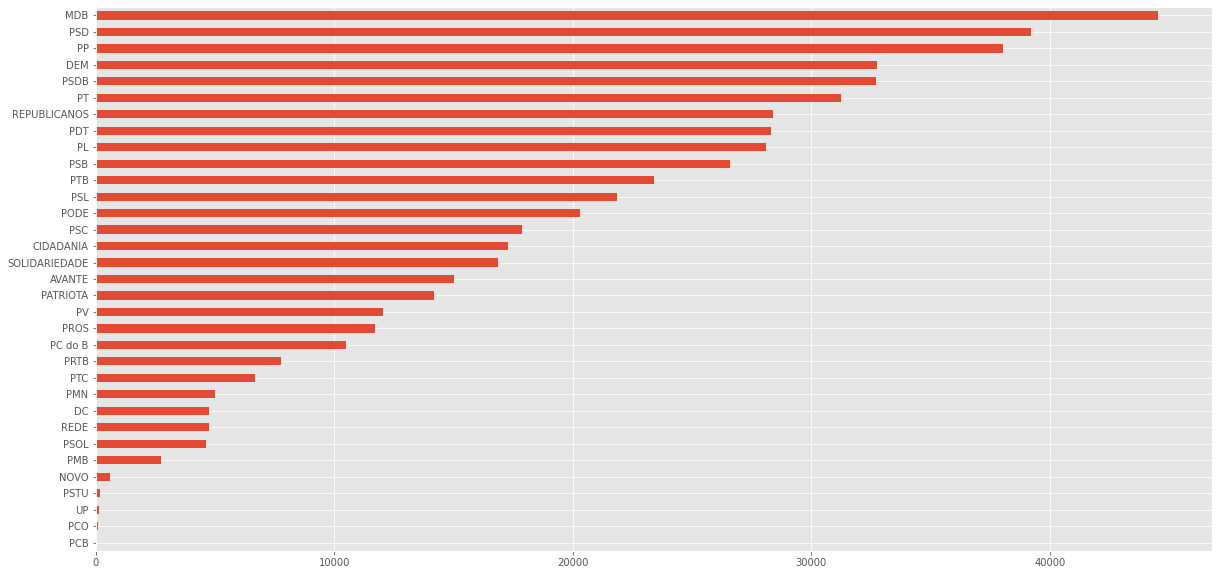

In [ ]:
df['SG_PARTIDO'].value_counts(ascending=True).plot(kind='barh')

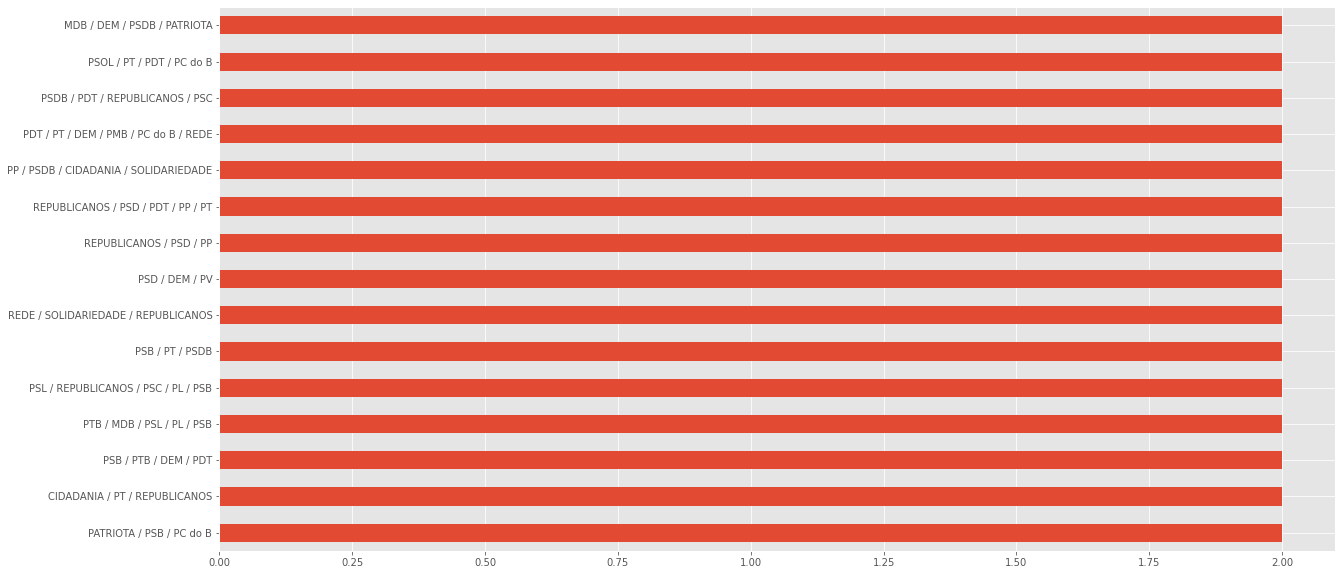

In [ ]:
df['DS_COMPOSICAO_COLIGACAO'].value_counts().tail(15).plot(kind='barh')

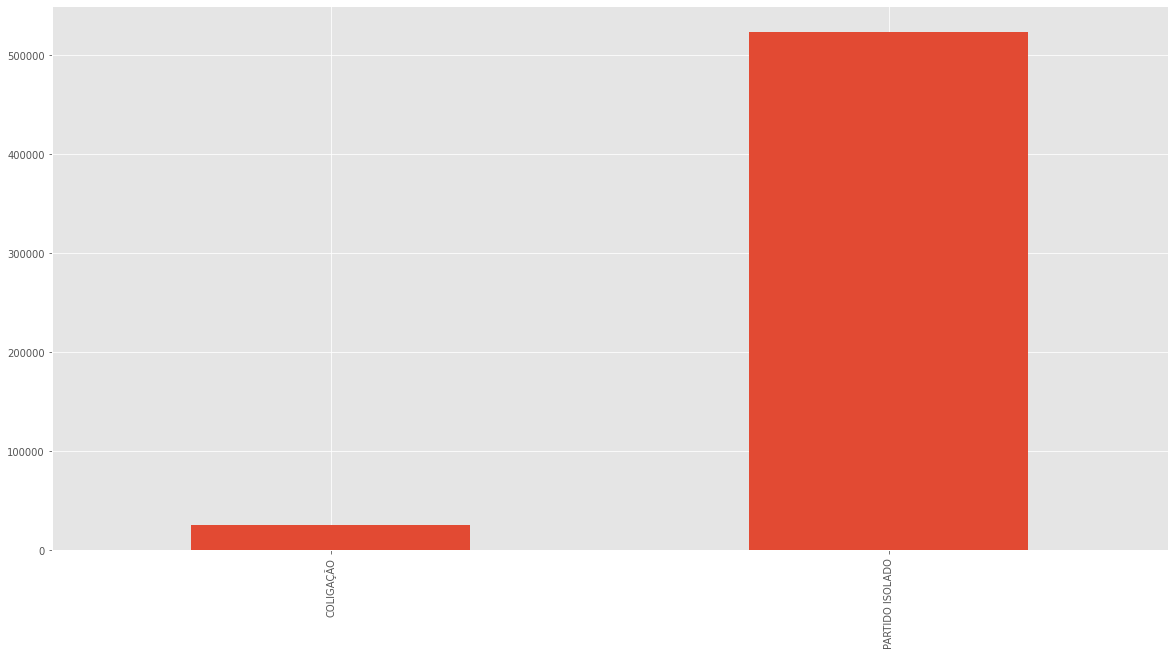

In [ ]:
df['TP_AGREMIACAO'].value_counts(ascending=True).plot(kind='bar')

In [ ]:
df['VR_DESPESA_MAX_CAMPANHA'].max()

51799384

In [ ]:
df[df['VR_DESPESA_MAX_CAMPANHA'] == 51799384]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
600980,SÃO PAULO,PREFEITO,250000693062,FILIPE TOMAZELLI SABARA,SABARÁ,#NULO#,PARTIDO ISOLADO,NOVO,PARTIDO NOVO,NOVO,BRASILEIRA NATA,SP,16/08/1983,37,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,EMPRESÁRIO,51799384,N,S
641891,SÃO PAULO,PREFEITO,250001094597,CELSO UBIRAJARA RUSSOMANNO,CELSO RUSSOMANNO,#NULO#,COLIGAÇÃO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS / PTB,BRASILEIRA NATA,SP,20/08/1956,64,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,JORNALISTA E REDATOR,51799384,N,S
684329,SÃO PAULO,PREFEITO,250001012981,MÁRCIO LUIZ FRANÇA GOMES,MÁRCIO FRANÇA,#NULO#,COLIGAÇÃO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PDT / PMN / PSB / AVANTE / SOLIDARIEDADE,BRASILEIRA NATA,SP,23/06/1963,57,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,51799384,N,S
703011,SÃO PAULO,PREFEITO,250000641390,ARTHUR MOLEDO DO VAL,ARTHUR DO VAL,#NULO#,PARTIDO ISOLADO,PATRIOTA,PATRIOTA,PATRIOTA,BRASILEIRA NATA,SP,21/08/1986,34,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,DEPUTADO,51799384,N,S
739360,SÃO PAULO,PREFEITO,250000746936,GUILHERME CASTRO BOULOS,GUILHERME BOULOS,#NULO#,COLIGAÇÃO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,PCB / PSOL / UP,BRASILEIRA NATA,SP,19/06/1982,38,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO SUPERIOR,51799384,N,S
747235,SÃO PAULO,PREFEITO,250000755896,JILMAR AUGUSTINHO TATTO,JILMAR TATTO,#NULO#,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PT,BRASILEIRA NATA,PR,25/06/1965,55,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,51799384,N,S
833334,SÃO PAULO,PREFEITO,250001172314,ANTÔNIO CARLOS SILVA,ANTÔNIO CARLOS,#NULO#,PARTIDO ISOLADO,PCO,PARTIDO DA CAUSA OPERÁRIA,PCO,BRASILEIRA NATA,RJ,11/11/1962,58,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,PROFESSOR DE ENSINO MÉDIO,51799384,N,S
863204,SÃO PAULO,PREFEITO,250000658458,JOICE CRISTINA HASSELMANN,JOICE HASSELMANN,#NULO#,COLIGAÇÃO,PSL,PARTIDO SOCIAL LIBERAL,DC / PSL,BRASILEIRA NATA,PR,29/01/1978,42,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,JORNALISTA E REDATOR,51799384,N,S
868510,SÃO PAULO,PREFEITO,250001152470,MARINA MEDEIROS HELOU,MARINA HELOU,#NULO#,PARTIDO ISOLADO,REDE,REDE SUSTENTABILIDADE,REDE,BRASILEIRA NATA,SP,25/08/1987,33,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,DEPUTADO,51799384,N,S
911157,SÃO PAULO,PREFEITO,250001013564,JOSE LEVY FIDELIX DA CRUZ,LEVY FIDELIX,#NULO#,PARTIDO ISOLADO,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PRTB,BRASILEIRA NATA,ES,27/12/1951,69,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,JORNALISTA E REDATOR,51799384,N,S


In [ ]:
# Não declarado = -1
df[df['VR_DESPESA_MAX_CAMPANHA'] == -1]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548341,JESÚPOLIS,VICE-PREFEITO,90000846770,MARCIO APARECIDO DA SILVA CAMARGO,MÁRCIO CAMARGO,#NULO#,COLIGAÇÃO,PL,PARTIDO LIBERAL,PL / PSL,BRASILEIRA NATA,GO,24/04/1977,43,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,VEREADOR,-1,N,S
548361,AREZ,VICE-PREFEITO,200000859462,ROSILDA ANISIO RODRIGUES DA SILVA,ROSILDA,#NULO#,PARTIDO ISOLADO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,PSOL,BRASILEIRA NATA,RN,04/03/1970,50,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,AGRICULTOR,-1,N,S
548373,MACAU,VICE-PREFEITO,200001180895,GILSON BEZERRA DA SILVA,IRMÃO GILSON,#NULO#,PARTIDO ISOLADO,SOLIDARIEDADE,SOLIDARIEDADE,SOLIDARIEDADE,BRASILEIRA NATA,RN,09/05/1974,46,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,CHAVEIRO,-1,N,S
548405,MARIANA,VICE-PREFEITO,130000950131,CRISTIANO VILAS BOAS,CRISTIANO VILAS BOAS,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PL / AVANTE / PT / MDB / PV,BRASILEIRA NATA,MG,12/09/2004,16,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,VEREADOR,-1,N,S
548410,TUPÃ,VICE-PREFEITO,250001022007,RENATO ALVES NUNES,PROF RENATO ALVES,#NULO#,COLIGAÇÃO,PV,PARTIDO VERDE,PV / PODE,BRASILEIRA NATA,SP,01/05/1972,48,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,PROFESSOR DE ENSINO SUPERIOR,-1,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096522,ARAÇAÍ,VICE-PREFEITO,130000856108,ANGELA MARIA DE SOUZA,ANJINHA,#NULO#,COLIGAÇÃO,PTB,PARTIDO TRABALHISTA BRASILEIRO,PSD / PTB,BRASILEIRA NATA,MG,19/04/1973,47,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PRETA,VEREADOR,-1,N,S
1096579,CARLOS BARBOSA,VICE-PREFEITO,210000646308,ROBERTO DA FRÉ,BETO DA FRÉ,#NULO#,COLIGAÇÃO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,MDB / PDT / PSB / PSC / PSD / PV,BRASILEIRA NATA,RS,02/08/1980,40,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,OUTROS,-1,N,S
1096618,CEZARINA,VICE-PREFEITO,90000784030,KLEYTON CANDIDO MONTEIRO,NENEM,#NULO#,COLIGAÇÃO,CIDADANIA,CIDADANIA,DEM / CIDADANIA,BRASILEIRA NATA,GO,25/06/1980,40,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,VEREADOR,-1,N,S
1096622,BIRITIBA MIRIM,VICE-PREFEITO,250001175544,NAIR VIEIRA,PROFESSORA NAIR,#NULO#,COLIGAÇÃO,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PV / PRTB,BRASILEIRA NATA,SP,24/01/1964,56,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,PROFESSOR DE ENSINO MÉDIO,-1,N,S


In [ ]:
df['VR_DESPESA_MAX_CAMPANHA'].mean()

98407.80378379069

In [ ]:
df[df['VR_DESPESA_MAX_CAMPANHA'] == 123077]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548493,PEDRO DE TOLEDO,PREFEITO,250000631787,CLAUDIO EVANGELISTA DA SILVA,CLAUDIO EVANGELISTA,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,SP,21/05/1969,51,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,ADMINISTRADOR,123077,N,S
548522,SÃO JOSÉ DE MIPIBU,PREFEITO,200000792901,NORMA FERREIRA CALDAS,NORMA FERREIRA,#NULO#,COLIGAÇÃO,PL,PARTIDO LIBERAL,PT / PL / DEM / PSB / PV / PSD,BRASILEIRA NATA,RN,15/04/1964,56,FEMININO,SUPERIOR COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,SERVIDOR PÚBLICO ESTADUAL,123077,N,S
548587,TAPERA,PREFEITO,210000980763,VOLMAR HELMUT KUHN,VOLMAR HELMUT KUHN,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PP / MDB,BRASILEIRA NATA,RS,15/10/1965,55,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,AGRICULTOR,123077,S,S
548707,MANAÍRA,PREFEITO,150001008516,MANOEL VIRGULINO SIMÃO,DR. MESSIAS SIMÃO,#NULO#,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PDT / PSC / PSDB / REPUBLICANOS,BRASILEIRA NATA,PB,08/09/1975,45,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,MÉDICO,123077,N,S
548890,LAGO VERDE,PREFEITO,100001048025,FRANCISCO GUIMARÃES DE OLIVEIRA,CHICO PILINO,#NULO#,COLIGAÇÃO,REPUBLICANOS,REPUBLICANOS,PC do B / REPUBLICANOS,BRASILEIRA NATA,MA,19/07/1956,64,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,123077,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096503,NOVO CRUZEIRO,PREFEITO,130000940181,MILTON COELHO DE OLIVEIRA,NEM CAPOTÃO,#NULO#,COLIGAÇÃO,PL,PARTIDO LIBERAL,PP / REPUBLICANOS / PL,BRASILEIRA NATA,MG,24/04/1973,47,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,PREFEITO,123077,N,S
1096627,ARAGUAINHA,PREFEITO,110001030278,FRANCISCO GONÇALVES NAVES,CHIQUINHO,#NULO#,COLIGAÇÃO,PSL,PARTIDO SOCIAL LIBERAL,PSL / REPUBLICANOS,BRASILEIRA NATA,MT,30/04/1974,46,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,MOTORISTA PARTICULAR,123077,N,S
1096642,CAPETINGA,PREFEITO,130000964862,ROBERTO TAYLOR VIEIRA,TAYLOR,#NULO#,COLIGAÇÃO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PP / PSD,BRASILEIRA NATA,MG,28/08/1952,68,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MÉDICO,123077,N,S
1096660,FELIZ,PREFEITO,210000670193,PAULO ALBERTO HAHN,PAULO HAHN,#NULO#,PARTIDO ISOLADO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,BRASILEIRA NATA,RS,12/01/1964,56,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,123077,N,S


In [ ]:
df['ST_DECLARAR_BENS'].value_counts()

S    532037
N     16302
Name: ST_DECLARAR_BENS, dtype: int64

In [ ]:
df[['DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].groupby('DS_GENERO').mean().sort_values('VR_DESPESA_MAX_CAMPANHA', ascending=False)

,VR_DESPESA_MAX_CAMPANHA
DS_GENERO,
MASCULINO,102909.092311
FEMININO,89336.042019


In [ ]:
df[(df['VR_DESPESA_MAX_CAMPANHA'] > 123077) & (df['VR_DESPESA_MAX_CAMPANHA'] <= 51799384)]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548348,CAMPO GRANDE,VEREADOR,120001077992,CRISTIANO ROBERTO CONSTANTINO,CRYS SANFONA,#NULO#,PARTIDO ISOLADO,PODE,PODEMOS,PODE,BRASILEIRA NATA,MS,14/07/1980,40,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,MÚSICO,732622,N,S
548350,BELO HORIZONTE,VEREADOR,130001197199,VANESSA PORTUGAL BARBOSA,VANESSA PORTUGAL,#NULO#,PARTIDO ISOLADO,PSTU,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,PSTU,BRASILEIRA NATA,MG,12/04/1970,50,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO FUNDAMENTAL,692183,N,S
548362,BELO HORIZONTE,VEREADOR,130001018063,FRANCIELLY NASCIMENTO LIMA,FRANCIELLY LIMA,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,MG,09/02/1992,28,FEMININO,LÊ E ESCREVE,SOLTEIRO(A),PARDA,MODELO,692183,N,S
548368,BELÉM,VEREADOR,140001198210,MICHELL MENDES DURANS DA SILVA,MICHELL DURANS,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,PA,02/07/1979,41,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ADVOGADO,438043,N,S
548372,PORTO VELHO,VEREADOR,220001082165,RAIMUNDA NONATA FERREIRA MOTA,OLINDA FERREIRA,#NULO#,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,AC,11/01/1966,54,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,DONA DE CASA,159288,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096656,ARAGUAÍNA,VEREADOR,270000830446,REJANE DO SOCORRO VIEIRA RIBEIRO,REJANE RIBEIRO,#NULO#,PARTIDO ISOLADO,PODE,PODEMOS,PODE,BRASILEIRA NATA,MA,04/08/1966,54,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",274057,N,S
1096662,GUARUJÁ,VEREADOR,250000825936,ANDERSON DE ARAUJO DIAS,ANDERSON ARAÚJO,#NULO#,PARTIDO ISOLADO,PODE,PODEMOS,PODE,BRASILEIRA NATA,SP,11/03/1980,40,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,SERRALHEIRO,216278,N,S
1096669,SÃO PAULO,VEREADOR,250000811399,MARIA SIMONE SANTOS,SIMONE SANTOS,#NULO#,PARTIDO ISOLADO,PODE,PODEMOS,PODE,BRASILEIRA NATA,AL,18/03/1987,33,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,CONTADOR,3675197,N,S
1096672,SANTANA DE PARNAÍBA,PREFEITO,250000976250,DANILO FERRARESI,DR DANILO FERRARESI,#NULO#,COLIGAÇÃO,PTB,PARTIDO TRABALHISTA BRASILEIRO,PTB / PSC,BRASILEIRA NATA,SP,11/06/1979,41,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,MÉDICO,1743718,N,S


In [ ]:
# Valor não informado == -1
df.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].sum().sort_values(ascending=False)

SG_PARTIDO
MDB              2789899510
PT               2692526880
PSD              2632411035
REPUBLICANOS     2561769560
PSDB             2485100445
PSL              2466559301
DEM              2361897403
PDT              2350037032
PP               2239044375
PSB              2160641336
PL               2127315747
PODE             2105776427
PTB              1996857328
SOLIDARIEDADE    1947840985
PSC              1870988930
PATRIOTA         1838853699
AVANTE           1817206234
CIDADANIA        1681075671
PC do B          1625415725
PRTB             1573945932
PV               1530830329
PROS             1487318977
PTC              1327775872
PSOL             1309188805
PMN              1011798281
DC               1000546996
REDE              928945412
PMB               785952474
NOVO              569302113
PSTU              290103764
PCO               247662031
UP                103161552
PCB                43086558
Name: VR_DESPESA_MAX_CAMPANHA, dtype: int64

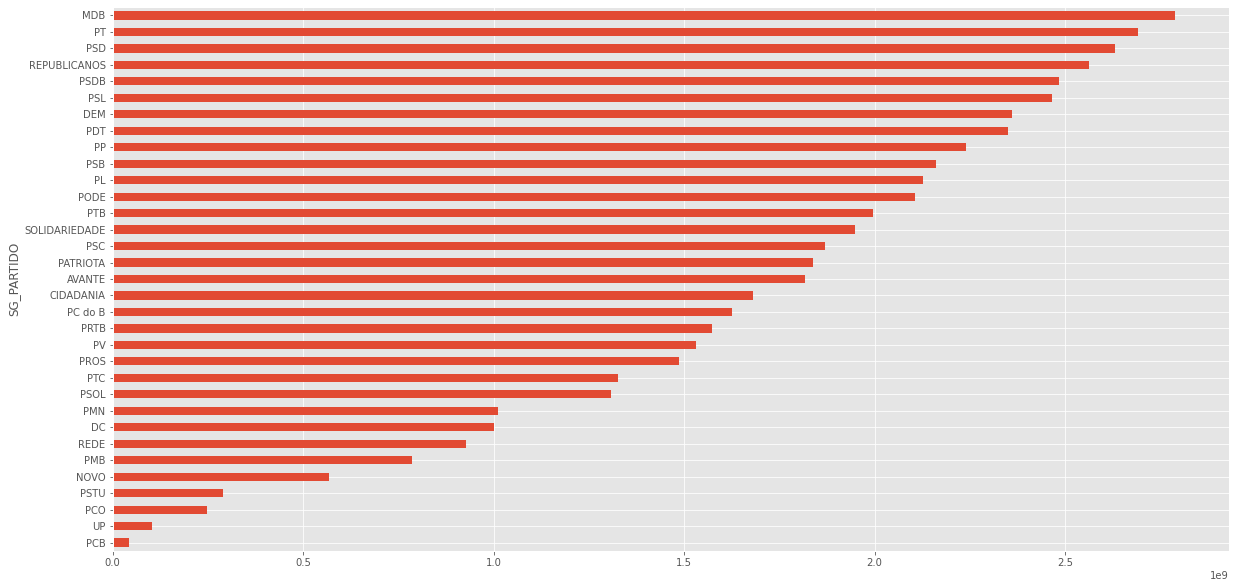

In [ ]:
df.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].sum().sort_values(ascending=True).plot(kind='barh')

In [ ]:
df[df['VR_DESPESA_MAX_CAMPANHA'] == df['VR_DESPESA_MAX_CAMPANHA'].max()][['DS_GENERO', 'DS_COR_RACA', 'NM_CANDIDATO']]

,DS_GENERO,DS_COR_RACA,NM_CANDIDATO
600980,MASCULINO,BRANCA,FILIPE TOMAZELLI SABARA
641891,MASCULINO,BRANCA,CELSO UBIRAJARA RUSSOMANNO
684329,MASCULINO,BRANCA,MÁRCIO LUIZ FRANÇA GOMES
703011,MASCULINO,BRANCA,ARTHUR MOLEDO DO VAL
739360,MASCULINO,BRANCA,GUILHERME CASTRO BOULOS
747235,MASCULINO,BRANCA,JILMAR AUGUSTINHO TATTO
833334,MASCULINO,PRETA,ANTÔNIO CARLOS SILVA
863204,FEMININO,BRANCA,JOICE CRISTINA HASSELMANN
868510,FEMININO,BRANCA,MARINA MEDEIROS HELOU
911157,MASCULINO,BRANCA,JOSE LEVY FIDELIX DA CRUZ


In [ ]:
df[df['ST_REELEICAO'] == 'S']

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548413,SANTANA,PREFEITO,30001201013,OFIRNEY DA CONCEIÇÃO SADALA,OFIRNEY SADALA,#NULO#,COLIGAÇÃO,AVANTE,AVANTE,PTB / AVANTE / PROS / PSC / PL / PSL,BRASILEIRA NATA,PA,12/07/1973,47,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,PREFEITO,471040,S,S
548436,VARZELÂNDIA,VEREADOR,130001068387,JOSÉ EDMUR GONÇALVES,EDMUR,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,MG,20/05/1958,62,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,SERVIDOR PÚBLICO MUNICIPAL,12308,S,S
548482,SATUBA,VEREADOR,20001215038,GILDETE CABRAL DA SILVA,GIL DO POVO,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,AL,02/06/1967,53,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,VEREADOR,15553,S,S
548504,OURO BRANCO,VEREADOR,130001032167,RODRIGO VIEIRA DUARTE,RODRIGO DUARTE (BALÃO),#NULO#,PARTIDO ISOLADO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSD,BRASILEIRA NATA,MG,01/02/1986,34,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,VEREADOR,52615,S,S
548541,SÃO JOSÉ DO RIO PRETO,VEREADOR,250001178193,PAULO ROBERTO AMBRÓSIO,PAULO PAULÉRA,#NULO#,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,SP,11/04/1957,63,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,REPRESENTANTE COMERCIAL,113319,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096567,SIMONÉSIA,VEREADOR,130001183824,JOSE ROBERTO DE MACEDO,JOSE ZERINO,#NULO#,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,MG,10/06/1966,54,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PARDA,OUTROS,12308,S,S
1096587,ITAOCA,VEREADOR,250001199260,EZIQUIEL BATISTA FORTES,EZIQUIEL FORTES,#NULO#,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,SP,09/10/1976,44,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AGENTE DE SAÚDE E SANITARISTA,12308,S,S
1096589,IGARASSU,VEREADOR,170001072324,AFONSO GERALDO DE SAMPAIO LUCENA,GUI,#NULO#,PARTIDO ISOLADO,PTB,PARTIDO TRABALHISTA BRASILEIRO,PTB,BRASILEIRA NATA,PE,09/06/1964,56,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,VEREADOR,39466,S,S
1096602,SIDROLÂNDIA,VEREADOR,120001047728,JUSCELINO PEREIRA VITURINO,JUSCELINO PEREIRA,#NULO#,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,PB,21/07/1988,32,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,VEREADOR,49492,S,S


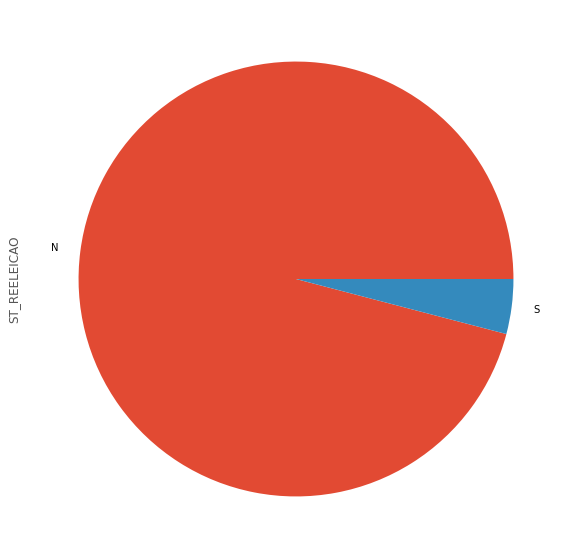

In [ ]:
df['ST_REELEICAO'].value_counts().plot(kind='pie')

Com as novas regras eleitorais para a eleição de vereador não é possível fazer coligações proporcionais, só candidatos isolados para impedir que a soma dos votos entre diferentes partidos. O voto é em lista e assim fica restrita aos candidatos da legenda. Será que algum partido não está cumprindo a Emenda Constitucional 97 (EC97)?

In [ ]:
df[(df['DS_CARGO'] == 'VEREADOR') & (df['TP_AGREMIACAO'] != 'COLIGAÇÃO')]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548339,MAURILÂNDIA,VEREADOR,90001032264,VALDINEI SILVA VIEIRA,DINEI MOTOS,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,GO,03/10/1980,40,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO,17122,N,S
548340,PALMEIRA DOS ÍNDIOS,VEREADOR,20001022098,CICERO JOAQUIM DOS SANTOS,BARRERITO,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,AL,02/12/1963,57,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,OUTROS,38798,N,S
548342,VÁRZEA GRANDE,VEREADOR,110000755162,DONATO BASTOS DE LIMA,DONATO LIMA,#NULO#,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,MT,22/12/1971,49,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,PUBLICITÁRIO,93964,N,S
548343,NOVA PONTE,VEREADOR,130000851658,DAYANE DOS SANTOS DIAS,DAYANE,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,MG,07/01/1987,33,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,DONA DE CASA,12308,N,S
548344,RIO NEGRINHO,VEREADOR,240001191922,REGINALDO LISBOA,REGINALDO LISBOA,#NULO#,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,SC,15/01/1982,38,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,OUTROS,12308,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096673,URANDI,VEREADOR,50000637363,SANDRA GUIMARÃES DIAS,SANDRA DE BONA,#NULO#,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,BA,18/12/1985,35,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PARDA,AGRICULTOR,12308,N,S
1096674,BARRA DE SÃO FRANCISCO,VEREADOR,80001209837,RENATO PINTO ROSA,RENATO PINTO ROSA,#NULO#,PARTIDO ISOLADO,PODE,PODEMOS,PODE,BRASILEIRA NATA,ES,17/11/1971,49,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,67900,N,S
1096675,FORMOSO DO ARAGUAIA,VEREADOR,270001053843,LUIS CARLOS RODRIGUES BRITO,SARACURA,#NULO#,PARTIDO ISOLADO,PSL,PARTIDO SOCIAL LIBERAL,PSL,BRASILEIRA NATA,TO,15/10/1962,58,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,"TÉCNICO CONTABILIDADE, ESTATÍSTICA, ECONOMIA D...",12308,N,S
1096676,BELO HORIZONTE,VEREADOR,130001013764,PATRÍCIA LEIVA DOS SANTOS,PATI LEIVA,#NULO#,PARTIDO ISOLADO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSD,BRASILEIRA NATA,MG,31/01/1983,37,FEMININO,SUPERIOR COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,OUTROS,692183,N,S


Para prefeito as coligações são permitidas.

In [ ]:
df[(df['DS_CARGO'] == 'PREFEITO') & (df['TP_AGREMIACAO'] != 'PARTIDO ISOLADO')]

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
548413,SANTANA,PREFEITO,30001201013,OFIRNEY DA CONCEIÇÃO SADALA,OFIRNEY SADALA,#NULO#,COLIGAÇÃO,AVANTE,AVANTE,PTB / AVANTE / PROS / PSC / PL / PSL,BRASILEIRA NATA,PA,12/07/1973,47,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,PREFEITO,471040,S,S
548443,IBIRAPITANGA,PREFEITO,50000769022,JEAN PEREIRA DE ASSUNÇÃO,JÉ,#NULO#,COLIGAÇÃO,PP,PROGRESSISTAS,PP / PL / REPUBLICANOS,BRASILEIRA NATA,BA,18/09/1972,48,MASCULINO,LÊ E ESCREVE,CASADO(A),PARDA,EMPRESÁRIO,189266,N,S
548496,SANTA LUZIA DO PARÁ,PREFEITO,140000761587,ADAMOR AIRES DE OLIVEIRA,ADAMOR AIRES,#NULO#,COLIGAÇÃO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB / DEM,BRASILEIRA NATA,PA,12/10/1966,54,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,ADVOGADO,178511,N,S
548522,SÃO JOSÉ DE MIPIBU,PREFEITO,200000792901,NORMA FERREIRA CALDAS,NORMA FERREIRA,#NULO#,COLIGAÇÃO,PL,PARTIDO LIBERAL,PT / PL / DEM / PSB / PV / PSD,BRASILEIRA NATA,RN,15/04/1964,56,FEMININO,SUPERIOR COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,SERVIDOR PÚBLICO ESTADUAL,123077,N,S
548587,TAPERA,PREFEITO,210000980763,VOLMAR HELMUT KUHN,VOLMAR HELMUT KUHN,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PP / MDB,BRASILEIRA NATA,RS,15/10/1965,55,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,AGRICULTOR,123077,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096581,RIO DO SUL,PREFEITO,240001128441,JEAN PIER XAVIER DE LIZ,JEAN DE LIZ,#NULO#,COLIGAÇÃO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT / PL,BRASILEIRA NATA,SC,19/02/1979,41,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,240774,N,S
1096627,ARAGUAINHA,PREFEITO,110001030278,FRANCISCO GONÇALVES NAVES,CHIQUINHO,#NULO#,COLIGAÇÃO,PSL,PARTIDO SOCIAL LIBERAL,PSL / REPUBLICANOS,BRASILEIRA NATA,MT,30/04/1974,46,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,MOTORISTA PARTICULAR,123077,N,S
1096642,CAPETINGA,PREFEITO,130000964862,ROBERTO TAYLOR VIEIRA,TAYLOR,#NULO#,COLIGAÇÃO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PP / PSD,BRASILEIRA NATA,MG,28/08/1952,68,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MÉDICO,123077,N,S
1096671,ÁGUIA BRANCA,PREFEITO,80001037223,JOSE CARLOS KUBIT,CARLIM KUBIT,#NULO#,COLIGAÇÃO,PSB,PARTIDO SOCIALISTA BRASILEIRO,REPUBLICANOS / PTC / PSD / PATRIOTA / PSB,BRASILEIRA NATA,ES,01/04/1968,52,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S


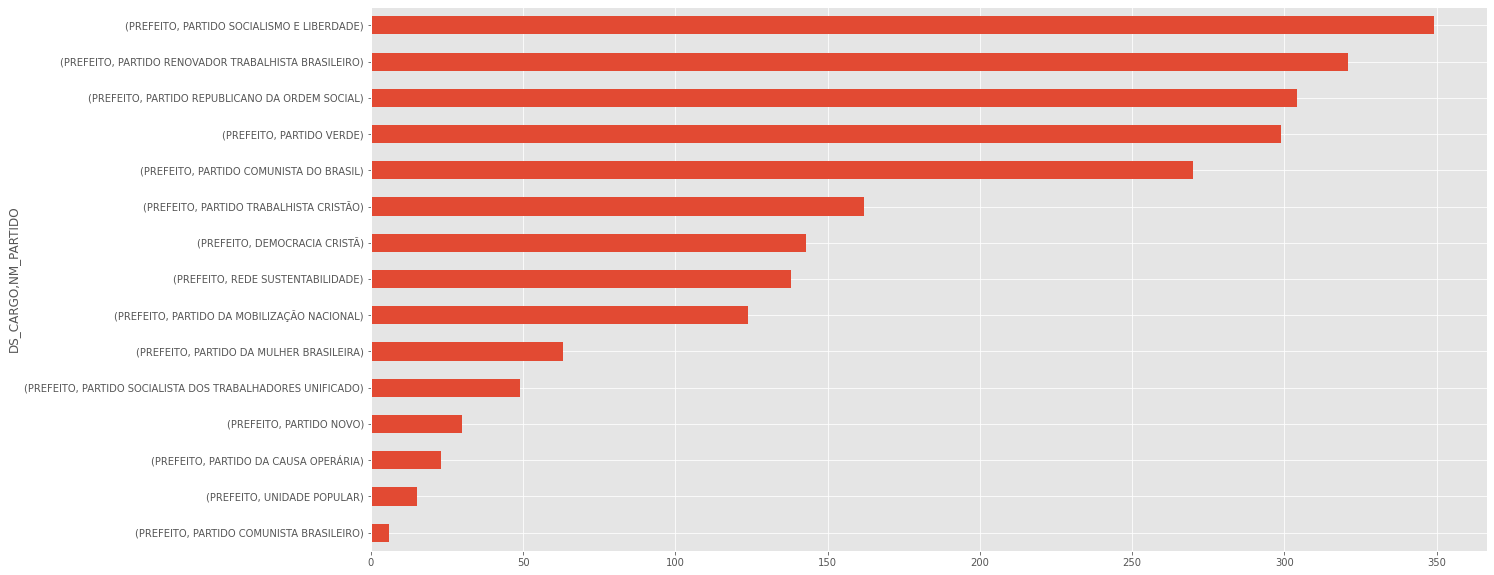

In [ ]:
df.groupby('DS_CARGO')['NM_PARTIDO'].value_counts(ascending=True).head(15).plot(kind='barh')

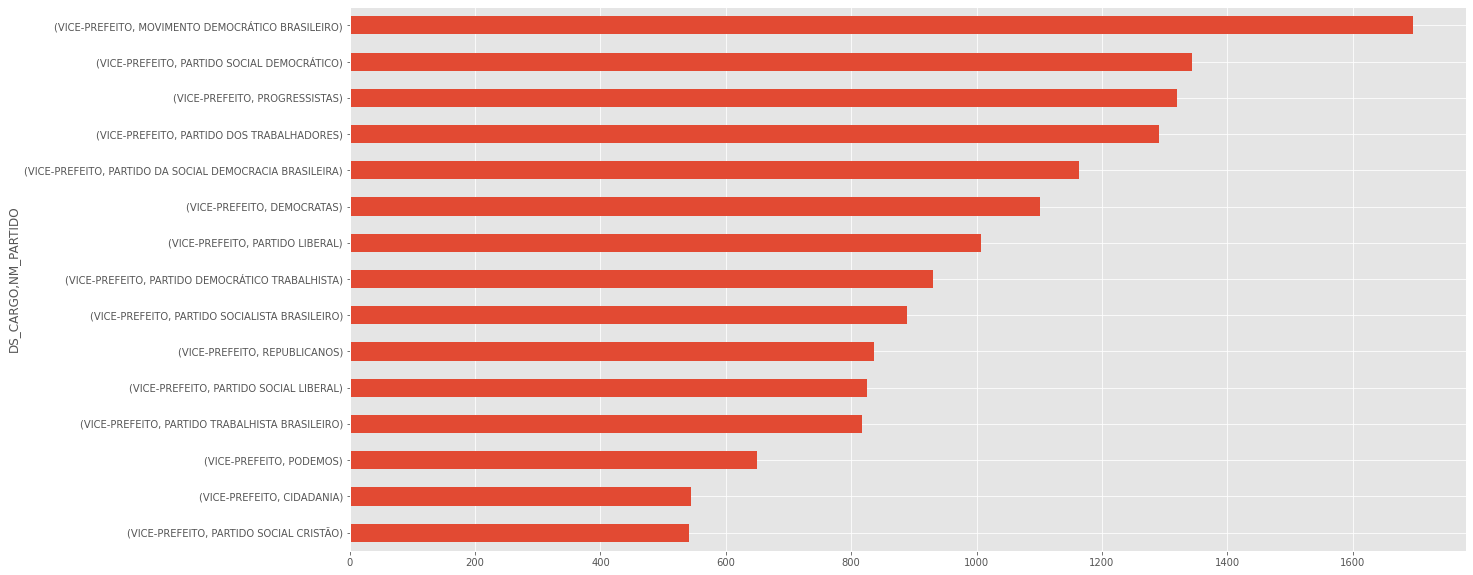

In [ ]:
df.groupby('DS_CARGO')['NM_PARTIDO'].value_counts(ascending=True).tail(15).plot(kind='barh')

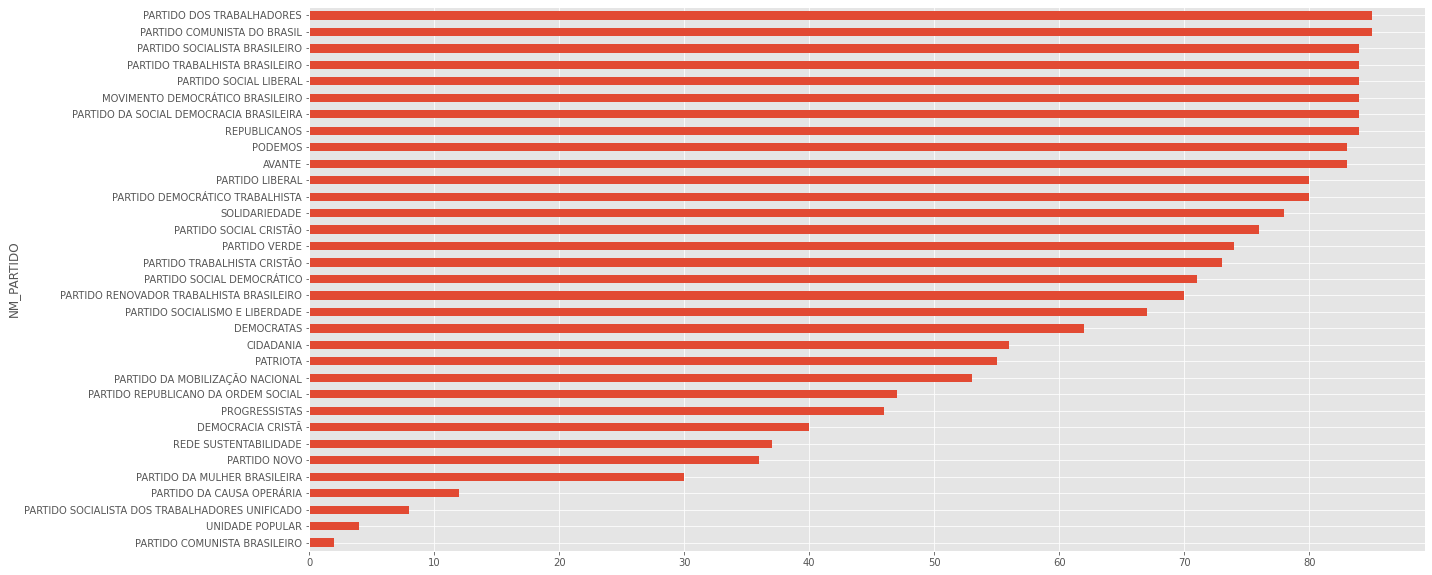

In [ ]:
df.query('NM_UE == "SÃO PAULO"').groupby('NM_PARTIDO').size().sort_values(ascending=True).plot(kind='barh')

Baixando o arquivo bem_candidato do TSE para unir os dois dataframes

In [ ]:
bens_cand = pd.read_csv('/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/bem_candidato_2020/bem_candidato_2020_BRASIL.csv', 
                        encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, decimal=',',
                        sep=';', quotechar='"', usecols=['SG_UF', 'SG_UE','NM_UE','SQ_CANDIDATO',
                                                         'DS_BEM_CANDIDATO','VR_BEM_CANDIDATO'])

In [ ]:
bens_cand.head()

,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,SP,62693,CABREÚVA,250000666093,dinheiro em especie,30000.0
1,PB,20192,EMAS,150000666102,FORD KA - 2015,30000.0
2,MG,43338,COIMBRA,130000679355,VEICULO ONIX PLUS 2020,75060.0
3,SP,61778,ARUJÁ,250000679376,1% de quotas da empresa Orion Comércio de GLP ...,300.0
4,SC,80330,ASCURRA,240000679388,CONTA CORRENTE VIACREDI,500.0


In [ ]:
bens_cand.columns = ['CODIGO_TSE' if x=='SG_UE' else x for x in bens_cand.columns] 

In [ ]:
bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997298 entries, 0 to 997297
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SG_UF             997298 non-null  object 
 1   CODIGO_TSE        997298 non-null  int64  
 2   NM_UE             997298 non-null  object 
 3   SQ_CANDIDATO      997298 non-null  int64  
 4   DS_BEM_CANDIDATO  997298 non-null  object 
 5   VR_BEM_CANDIDATO  997298 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 45.7+ MB


In [ ]:
bens_cand.isnull().sum()

SG_UF               0
CODIGO_TSE          0
NM_UE               0
SQ_CANDIDATO        0
DS_BEM_CANDIDATO    0
VR_BEM_CANDIDATO    0
dtype: int64

In [ ]:
bens_cand['SQ_CANDIDATO'].nunique()

335299

In [ ]:
bens_cand.drop_duplicates(keep='last', inplace=True)

In [ ]:
bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994012 entries, 0 to 997297
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SG_UF             994012 non-null  object 
 1   CODIGO_TSE        994012 non-null  int64  
 2   NM_UE             994012 non-null  object 
 3   SQ_CANDIDATO      994012 non-null  int64  
 4   DS_BEM_CANDIDATO  994012 non-null  object 
 5   VR_BEM_CANDIDATO  994012 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 53.1+ MB


In [ ]:
bens_cand.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].sum().sort_values(ascending=False)

SQ_CANDIDATO
140001040663    1.061359e+10
190001019131    4.913114e+09
100001086775    3.501610e+09
250000806484    2.536050e+09
160001000870    1.553326e+09
                    ...     
170000955059    0.000000e+00
250001081096    0.000000e+00
130001079276    0.000000e+00
170000955065    0.000000e+00
180000985055    0.000000e+00
Name: VR_BEM_CANDIDATO, Length: 335299, dtype: float64

In [ ]:
candidatos = df.merge(bens_cand, on='SQ_CANDIDATO', how='left')
candidatos.head(3).T

,0,1,2
NM_UE_x,MAURILÂNDIA,MAURILÂNDIA,PALMEIRA DOS ÍNDIOS
DS_CARGO,VEREADOR,VEREADOR,VEREADOR
SQ_CANDIDATO,90001032264,90001032264,20001022098
NM_CANDIDATO,VALDINEI SILVA VIEIRA,VALDINEI SILVA VIEIRA,CICERO JOAQUIM DOS SANTOS
NM_URNA_CANDIDATO,DINEI MOTOS,DINEI MOTOS,BARRERITO
NM_SOCIAL_CANDIDATO,#NULO#,#NULO#,#NULO#
TP_AGREMIACAO,PARTIDO ISOLADO,PARTIDO ISOLADO,PARTIDO ISOLADO
SG_PARTIDO,MDB,MDB,PSB
NM_PARTIDO,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PARTIDO SOCIALISTA BRASILEIRO
DS_COMPOSICAO_COLIGACAO,MDB,MDB,PSB


In [ ]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207052 entries, 0 to 1207051
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   NM_UE_x                  1207052 non-null  object 
 1   DS_CARGO                 1207052 non-null  object 
 2   SQ_CANDIDATO             1207052 non-null  int64  
 3   NM_CANDIDATO             1207052 non-null  object 
 4   NM_URNA_CANDIDATO        1207048 non-null  object 
 5   NM_SOCIAL_CANDIDATO      1207052 non-null  object 
 6   TP_AGREMIACAO            1207052 non-null  object 
 7   SG_PARTIDO               1207052 non-null  object 
 8   NM_PARTIDO               1207052 non-null  object 
 9   DS_COMPOSICAO_COLIGACAO  1207052 non-null  object 
 10  DS_NACIONALIDADE         1207052 non-null  object 
 11  SG_UF_NASCIMENTO         1207052 non-null  object 
 12  DT_NASCIMENTO            1207052 non-null  object 
 13  NR_IDADE_DATA_POSSE      1207052 non-null 